In [46]:
# LoganDowning-M02-Dataset-FINAL-2.py
# Feb 29, 2018
# Datasci 400

# Datasource is the "Hepatitis" dataset located at UCI Machine Learning Repo
# http://archive.ics.uci.edu/ml/datasets/Hepatitis

In [47]:
# import needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [48]:
# Here is the source datafile and its properties:

# file location (http):
f = 'http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data'
# local file:
f = 'hepatitis.data'

# headers for the datafile: 1 class (first column) + 19 attributes
# from: http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.names
headers = ['Survived', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver Big', 'Liver Firm', 'Spleen Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk Phosphate', 'SGOT', 'Albumin', 'Protime', 'Histology']


In [49]:
# Grab the csv data file (it doesn't have a header)
df0 = pd.read_csv( f, header=None )
df0.head()

0   1   2  3   4  5  6  7  8  9  10 11 12 13    14   15   16   17  18  19
0   2  30   2  1   2  2  2  2  1  2  2  2  2  2  1.00   85   18  4.0   ?   1
1   2  50   1  1   2  1  2  2  1  2  2  2  2  2  0.90  135   42  3.5   ?   1
2   2  78   1  2   2  1  2  2  2  2  2  2  2  2  0.70   96   32  4.0   ?   1
3   2  31   1  ?   1  2  2  2  2  2  2  2  2  2  0.70   46   52  4.0  80   1
4   2  34   1  2   2  2  2  2  2  2  2  2  2  2  1.00    ?  200  4.0   ?   1

In [50]:
# Simulate multi-valued categorical data by inventing 1 new column:
# for the purpose of this assignment invent a new (fake) column that contains 
# multiple category values. I need to do this because all the actual categorical 
# columns already contain binary (0,1) values, not subject to binning, etc.
#
# 1 = Merck
# 2 = Merck Canada Inc.
# 3 = Novartis AG
# 4 = Novartis Grimsby
# 5 = Eli Lilly
# 6 = Pfizer
#
fake_categories = ['Merck','Merck Canada Inc.','Novartis AG','Novartis Grimsby','Eli Lilly','Pfizer']
def generate_fake_value():
    n = np.random.randint(1,len(fake_categories)+1)
    # make 5% of the data missing by returning "?"
    return str(n) if (np.random.rand()>.05) else "?"
df0[20] = pd.Series( [generate_fake_value() for i in np.arange(0,len(df0))] )
print("Fabricated multi-valued categorical data in new last column. Distribution:",df0[20].value_counts(),sep='\n')

Fabricated multi-valued categorical data in new last column. Distribution:
1    35
6    32
5    26
4    26
2    20
3    13
?     3
Name: 20, dtype: int64


In [51]:
# Missing values are denoted with "?" so turn those into NaN
df0.replace("?",np.nan,inplace=True)
df0.head()

0   1   2    3   4  5  6  7  8  9  ... 11 12 13    14   15   16   17   18  \
0   2  30   2    1   2  2  2  2  1  2 ...  2  2  2  1.00   85   18  4.0  NaN   
1   2  50   1    1   2  1  2  2  1  2 ...  2  2  2  0.90  135   42  3.5  NaN   
2   2  78   1    2   2  1  2  2  2  2 ...  2  2  2  0.70   96   32  4.0  NaN   
3   2  31   1  NaN   1  2  2  2  2  2 ...  2  2  2  0.70   46   52  4.0   80   
4   2  34   1    2   2  2  2  2  2  2 ...  2  2  2  1.00  NaN  200  4.0  NaN   

  19  20  
0  1   1  
1  1   6  
2  1   2  
3  1   5  
4  1   4  

[5 rows x 21 columns]

In [52]:
# Decode the 20th column, the (fake) categorical list of companies supplying the drug
df0.loc[df0[20]=="1",20] = fake_categories[0]
df0.loc[df0[20]=="2",20] = fake_categories[1]
df0.loc[df0[20]=="3",20] = fake_categories[2]
df0.loc[df0[20]=="4",20] = fake_categories[3]
df0.loc[df0[20]=="5",20] = fake_categories[4]
df0.loc[df0[20]=="6",20] = fake_categories[5]

In [53]:
# Get a value count of the 20th column (omits NaN)
df0[20].value_counts()

Merck                35
Pfizer               32
Novartis Grimsby     26
Eli Lilly            26
Merck Canada Inc.    20
Novartis AG          13
Name: 20, dtype: int64

In [54]:
# Bin (simplify) the category values by combining related pharmas: Merck and Novartis
df0.loc[ df0[20]=='Merck Canada Inc.' ,20] = 'Merck' # Combine both Merck into one category
df0.loc[ df0[20]=='Novartis AG'       ,20] = 'Novartis' # Create a new Novartis category for
df0.loc[ df0[20]=='Novartis Grimsby'  ,20] = 'Novartis' #  the Novartis pharmas
df0[20].value_counts()

Merck        55
Novartis     39
Pfizer       32
Eli Lilly    26
Name: 20, dtype: int64

In [55]:
# Impute missing values in the Pharma column (column index 20)
# Replace the NaN with the dominant pharma 
print("Imputed missing data in Pharma column which has {} NaN values. New distribution:".format(sum(df0[20].isnull())))
df0[20] = df0[20].fillna( df0[20].value_counts().index.values[0] )
df0[20].value_counts()

Imputed missing data in Pharma column which has 3 NaN values. New distribution:


Merck        58
Novartis     39
Pfizer       32
Eli Lilly    26
Name: 20, dtype: int64

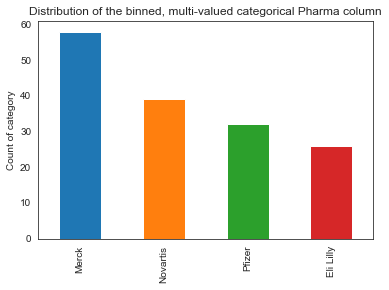

In [56]:
# Visualize the distribution of the categorical data in 20th column
ax = df0[20].value_counts().plot(kind='bar')
_=ax.set_title("Distribution of the binned, multi-valued categorical Pharma column")
_=ax.set_ylabel("Count of category")

In [57]:
# Remove any record that has too many NaN (there is just one record of this type)
# and assign to a new dataframe to preserve our original dataset for reference:
df = df0.dropna(thresh=10)

In [58]:
# Create dummy columns for the multi-valued pharma categorical column (label 20)
df = pd.get_dummies(data=df, columns=[20], drop_first=True, prefix="Pharma")
df.head()

0   1  2    3  4  5  6  7  8  9      ...       13    14   15   16   17  \
0  2  30  2    1  2  2  2  2  1  2      ...        2  1.00   85   18  4.0   
1  2  50  1    1  2  1  2  2  1  2      ...        2  0.90  135   42  3.5   
2  2  78  1    2  2  1  2  2  2  2      ...        2  0.70   96   32  4.0   
3  2  31  1  NaN  1  2  2  2  2  2      ...        2  0.70   46   52  4.0   
4  2  34  1    2  2  2  2  2  2  2      ...        2  1.00  NaN  200  4.0   

    18 19 Pharma_Merck Pharma_Novartis  Pharma_Pfizer  
0  NaN  1            1               0              0  
1  NaN  1            0               0              1  
2  NaN  1            1               0              0  
3   80  1            0               0              0  
4  NaN  1            0               1              0  

[5 rows x 23 columns]

In [59]:
# Convert all values into float (we'll reconvert categorical columns to int later)
df = df.astype("float")
df.describe()

0           1           2           3           4           5  \
count  154.000000  154.000000  154.000000  153.000000  154.000000  154.000000   
mean     1.792208   41.246753    1.103896    1.509804    1.844156    1.350649   
std      0.407051   12.593344    0.306121    0.501546    0.363891    0.478730   
min      1.000000    7.000000    1.000000    1.000000    1.000000    1.000000   
25%      2.000000   32.000000    1.000000    1.000000    2.000000    1.000000   
50%      2.000000   39.000000    1.000000    2.000000    2.000000    1.000000   
75%      2.000000   50.000000    1.000000    2.000000    2.000000    2.000000   
max      2.000000   78.000000    2.000000    2.000000    2.000000    2.000000   

                6           7           8           9      ...        \
count  154.000000  154.000000  145.000000  144.000000      ...         
mean     1.603896    1.792208    1.827586    1.583333      ...         
std      0.490682    0.407051    0.379049    0.494727      ...         
min      1.000000    1.000000    1.000000    1.000000      ...         
25%      1.000000    2.000000    2.000000    1.000000      ...         
50%      2.000000    2.000000    2.000000    2.000000      ...         
75%      2.000000    2.000000    2.000000    2.000000      ...         
max      2.000000    2.000000    2.000000    2.000000      ...         

              13          14          15         16          17          18  \
count  150.00000  149.000000  126.000000  151.00000  139.000000   88.000000   
mean     1.88000    1.427517  105.325397   85.89404    3.817266   61.852273   
std      0.32605    1.212149   51.508109   89.65089    0.651523   22.875244   
min      1.00000    0.300000   26.000000   14.00000    2.100000    0.000000   
25%      2.00000    0.700000   74.250000   31.50000    3.400000   46.000000   
50%      2.00000    1.000000   85.000000   58.00000    4.000000   61.000000   
75%      2.00000    1.500000  132.250000  100.50000    4.200000   76.250000   
max      2.00000    8.000000  295.000000  648.00000    6.400000  100.000000   

               19  Pharma_Merck  Pharma_Novartis  Pharma_Pfizer  
count  154.000000    154.000000       154.000000     154.000000  
mean     1.454545      0.376623         0.246753       0.207792  
std      0.499554      0.486120         0.432528       0.407051  
min      1.000000      0.000000         0.000000       0.000000  
25%      1.000000      0.000000         0.000000       0.000000  
50%      1.000000      0.000000         0.000000       0.000000  
75%      2.000000      1.000000         0.000000       0.000000  
max      2.000000      1.000000         1.000000       1.000000  

[8 rows x 23 columns]

In [60]:
# See which columns have NaN and how many each has
print("Nulls by column:")
df.isnull().sum()

Nulls by column:


0                   0
1                   0
2                   0
3                   1
4                   0
5                   0
6                   0
7                   0
8                   9
9                  10
10                  4
11                  4
12                  4
13                  4
14                  5
15                 28
16                  3
17                 15
18                 66
19                  0
Pharma_Merck        0
Pharma_Novartis     0
Pharma_Pfizer       0
dtype: int64

In [61]:
# One column, Protime (label: 18), has too many NaN to be useful (43% of records), so just drop it
df.drop(18,axis=1,inplace=True)

In [62]:
# For the four continuous columns (labels: 14, 15, 16, 17) replace NaN with each column's mean
df[14] = df[14].fillna( df[14].mean() )
df[15] = df[15].fillna( df[15].mean() )
df[16] = df[16].fillna( df[16].mean() )
df[17] = df[17].fillna( df[17].mean() )

In [63]:
## Deal with missing categorical data next (column labels: 3, 8-13)

In [64]:
# Examine correlations between the categorical columns
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
corr = df.drop([0,1,14,15,16,17],axis=1).corr()
plt.figure(figsize=(12,8))

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr.abs(),cmap='BuGn',mask=mask) #note plotting absolute correlation
# Results:
# Columns 8 and 9 are highly correlated (Big Liver, Firm Liver)
# Columns 5, 6 and 7 are highly correlated (Fatigue, Malaise, Anorexia)

In [65]:
# Check out column label 3 (Steroid) which is missing in just one record (row index 3)
df[ df[3].isnull() ]

0     1    2   3    4    5    6    7    8    9      ...         12   13  \
3  2.0  31.0  1.0 NaN  1.0  2.0  2.0  2.0  2.0  2.0      ...        2.0  2.0   

    14    15    16   17   19  Pharma_Merck  Pharma_Novartis  Pharma_Pfizer  
3  0.7  46.0  52.0  4.0  1.0           0.0              0.0            0.0  

[1 rows x 22 columns]

In [66]:
# Examine a pairplot and see what other columns are similar:
#sns.pairplot(data=df.loc[:,[2,3,4,5,6,7,8,9,10,11,12,19]].dropna(), hue=3)
# Based on this record's other categorical values, there is a slight preference for 2.0 so impute that value
df[3].fillna(2.0,inplace=True)


In [67]:
# Column label 8 (Liver Big) and 9 (Liver Firm) - missing both in 9 records
df[ df[8].isnull() ]

0     1    2    3    4    5    6    7   8   9      ...         12   13  \
31   1.0  62.0  1.0  1.0  2.0  1.0  1.0  2.0 NaN NaN      ...        2.0  2.0   
41   2.0  23.0  1.0  2.0  2.0  2.0  2.0  2.0 NaN NaN      ...        NaN  NaN   
72   2.0  51.0  1.0  2.0  2.0  1.0  1.0  1.0 NaN NaN      ...        NaN  NaN   
92   2.0  33.0  1.0  2.0  2.0  2.0  2.0  2.0 NaN NaN      ...        2.0  2.0   
106  1.0  35.0  1.0  1.0  2.0  1.0  2.0  2.0 NaN NaN      ...        1.0  2.0   
118  1.0  61.0  1.0  1.0  2.0  1.0  1.0  2.0 NaN NaN      ...        2.0  2.0   
126  2.0  28.0  1.0  2.0  2.0  1.0  1.0  1.0 NaN NaN      ...        1.0  2.0   
141  1.0  54.0  1.0  1.0  2.0  1.0  1.0  2.0 NaN NaN      ...        1.0  2.0   
147  1.0  70.0  1.0  1.0  2.0  1.0  1.0  1.0 NaN NaN      ...        NaN  NaN   

           14          15         16        17   19  Pharma_Merck  \
31   1.000000  105.325397   60.00000  3.817266  1.0           0.0   
41   4.600000   56.000000   16.00000  4.600000  1.0           0.0   
72   0.900000   76.000000  271.00000  4.400000  1.0           1.0   
92   1.000000  105.325397   60.00000  4.000000  2.0           0.0   
106  1.500000  138.000000   58.00000  2.600000  2.0           1.0   
118  1.427517  105.325397   85.89404  3.817266  2.0           1.0   
126  1.000000  105.325397   20.00000  4.000000  2.0           1.0   
141  3.900000  120.000000   28.00000  3.500000  2.0           1.0   
147  1.700000  109.000000  528.00000  2.800000  2.0           1.0   

     Pharma_Novartis  Pharma_Pfizer  
31               0.0            1.0  
41               0.0            1.0  
72               0.0            0.0  
92               0.0            1.0  
106              0.0            0.0  
118              0.0            0.0  
126              0.0            0.0  
141              0.0            0.0  
147              0.0            0.0  

[9 rows x 22 columns]

In [68]:
# get overall counts for these columns
print("Value counts for columns 8, 9:")
print("Col 8:",df[8].value_counts(),sep="\n")
print("Col 9:",df[9].value_counts(),sep="\n")

Value counts for columns 8, 9:
Col 8:
2.0    120
1.0     25
Name: 8, dtype: int64
Col 9:
2.0    84
1.0    60
Name: 9, dtype: int64


In [69]:
# Since columns 8 and 9 are highly correlated, and column 8 is predominantly 2.0, go with 
# the dominant value (2.0) for these columns
df[8].fillna(2.0,inplace=True)
df[9].fillna(2.0,inplace=True)
print("Nulls by column:")
df.isnull().sum()

Nulls by column:


0                  0
1                  0
2                  0
3                  0
4                  0
5                  0
6                  0
7                  0
8                  0
9                  0
10                 4
11                 4
12                 4
13                 4
14                 0
15                 0
16                 0
17                 0
19                 0
Pharma_Merck       0
Pharma_Novartis    0
Pharma_Pfizer      0
dtype: int64

In [70]:
# The remaining categorical columns (10-13) are all missing in the same four records 
# (row indices 41, 72, 83 and 147 )
df[ df.isnull().any(axis=1) ]

0     1    2    3    4    5    6    7    8    9      ...        12  13  \
41   2.0  23.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0      ...       NaN NaN   
72   2.0  51.0  1.0  2.0  2.0  1.0  1.0  1.0  2.0  2.0      ...       NaN NaN   
83   2.0  67.0  2.0  1.0  2.0  1.0  1.0  2.0  2.0  2.0      ...       NaN NaN   
147  1.0  70.0  1.0  1.0  2.0  1.0  1.0  1.0  2.0  2.0      ...       NaN NaN   

      14     15     16   17   19  Pharma_Merck  Pharma_Novartis  Pharma_Pfizer  
41   4.6   56.0   16.0  4.6  1.0           0.0              0.0            1.0  
72   0.9   76.0  271.0  4.4  1.0           1.0              0.0            0.0  
83   1.5  179.0   69.0  2.9  1.0           0.0              0.0            1.0  
147  1.7  109.0  528.0  2.8  2.0           1.0              0.0            0.0  

[4 rows x 22 columns]

In [71]:
print("Value counts for columns 10, 11, 12, and 13:")
print("Col 10:",df[10].value_counts(),sep="\n")
print("Col 11:",df[11].value_counts(),sep="\n")
print("Col 12:",df[12].value_counts(),sep="\n")
print("Col 13:",df[13].value_counts(),sep="\n")

Value counts for columns 10, 11, 12, and 13:
Col 10:
2.0    120
1.0     30
Name: 10, dtype: int64
Col 11:
2.0    99
1.0    51
Name: 11, dtype: int64
Col 12:
2.0    130
1.0     20
Name: 12, dtype: int64
Col 13:
2.0    132
1.0     18
Name: 13, dtype: int64


In [72]:
# Impute these values to the dominating value (2.0)
df[10].fillna(2.0,inplace=True)
df[11].fillna(2.0,inplace=True)
df[12].fillna(2.0,inplace=True)
df[13].fillna(2.0,inplace=True)

In [73]:
# Convert the original categorical columns into int type...
for i in [0,2,3,4,5,6,7,8,9,10,11,12,13,19]:
    df[i] = df[i].astype('int')
# ...plus the final three dummy categories created in this script
for i in [-1,-2,-3]:
    df.iloc[:,i] = df.iloc[:,i].astype('int')
df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 154
Data columns (total 22 columns):
0                  154 non-null int64
1                  154 non-null float64
2                  154 non-null int64
3                  154 non-null int64
4                  154 non-null int64
5                  154 non-null int64
6                  154 non-null int64
7                  154 non-null int64
8                  154 non-null int64
9                  154 non-null int64
10                 154 non-null int64
11                 154 non-null int64
12                 154 non-null int64
13                 154 non-null int64
14                 154 non-null float64
15                 154 non-null float64
16                 154 non-null float64
17                 154 non-null float64
19                 154 non-null int64
Pharma_Merck       154 non-null int64
Pharma_Novartis    154 non-null int64
Pharma_Pfizer      154 non-null int64
dtypes: float64(5), int64(17)
memory usage: 27.7 

In [74]:
# The categorical data are in the format 1=no, 2=yes. Normalize those into
# more typical 0=no, 1=yes
for i in [0,2,3,4,5,6,7,8,9,10,11,12,13,19]:
    df[i] = df[i]-1

In [75]:
df.head()

0     1  2  3  4  5  6  7  8  9      ...        12  13   14          15  \
0  1  30.0  1  0  1  1  1  1  0  1      ...         1   1  1.0   85.000000   
1  1  50.0  0  0  1  0  1  1  0  1      ...         1   1  0.9  135.000000   
2  1  78.0  0  1  1  0  1  1  1  1      ...         1   1  0.7   96.000000   
3  1  31.0  0  1  0  1  1  1  1  1      ...         1   1  0.7   46.000000   
4  1  34.0  0  1  1  1  1  1  1  1      ...         1   1  1.0  105.325397   

      16   17  19  Pharma_Merck  Pharma_Novartis  Pharma_Pfizer  
0   18.0  4.0   0             1                0              0  
1   42.0  3.5   0             0                0              1  
2   32.0  4.0   0             1                0              0  
3   52.0  4.0   0             0                0              0  
4  200.0  4.0   0             0                1              0  

[5 rows x 22 columns]

In [76]:
# Prepare to normalize the four continuously numeric columns (labels: 14-17)

In [77]:
df[[14,15,16,17]].describe()

14          15          16          17
count  154.000000  154.000000  154.000000  154.000000
mean     1.427517  105.325397   85.894040    3.817266
std      1.192178   46.556990   88.767608    0.618762
min      0.300000   26.000000   14.000000    2.100000
25%      0.800000   78.000000   32.250000    3.500000
50%      1.000000  101.000000   58.500000    3.900000
75%      1.500000  119.750000   99.500000    4.200000
max      8.000000  295.000000  648.000000    6.400000

In [78]:
# the age column (label:1) is continuously-variable but discrete. derive new values
# that create a banded version with simplified values.

# examine the distribution of values (8 bins gives a nice distribution):
ax=sns.distplot(df[1],bins=8,hist_kws={'edgecolor':'white'},kde=False)
_=ax.set_title("Distribution of Age attribute")
_=ax.set_xlabel("Age")
_=ax.set_ylabel("Frequency")


In [79]:
# create even-level bands for age attribute

n_bins = 8 # desired number of bins
freq, bounds = np.histogram(df[1],bins=n_bins)
print("Age attribute histogram bin bounds (edges):")
print(bounds)
print("Age attribute histogram counts (per bin):")
print(freq)

# assign whole values for each bin (approx the bin average).
age_bin_values = [ 11, 20, 29, 38, 47, 56, 65, 74  ]

Age attribute histogram bin bounds (edges):
[  7.     15.875  24.75   33.625  42.5    51.375  60.25   69.125  78.   ]
Age attribute histogram counts (per bin):
[ 1 11 32 46 33 18 10  3]


In [80]:
# initialize a temporary age bounds series to be the index (option base 1) of the assigned bin
df['Age Bounds (tmp)'] = np.digitize(df[1], bounds) # 1 to n_bins+1

# assign anything in bin (n_bins+1) to be in bin (n_bins)
# because np.digitize uses open intervals [val,val) even for the max right edge
findmax = df['Age Bounds (tmp)'] > n_bins
df.loc[findmax,'Age Bounds (tmp)'] = n_bins

# assign new binned values to each datapoint
df['Age Bounds (tmp)'] = df['Age Bounds (tmp)'].map(lambda x: age_bin_values[x-1])

print("Comparison of actual (Column 1) to assigned (Age Bounds (tmp)) values for Age")
df[[1,'Age Bounds (tmp)']].head()

Comparison of actual (Column 1) to assigned (Age Bounds (tmp)) values for Age


1  Age Bounds (tmp)
0  30.0                29
1  50.0                47
2  78.0                74
3  31.0                29
4  34.0                38

In [81]:
# and finally re-assign the existing Age column (label:1) with the newly-banded values
# and drop the temporary series
df[1] = df['Age Bounds (tmp)']
df.drop('Age Bounds (tmp)', axis=1, inplace=True)
df.head()

0   1  2  3  4  5  6  7  8  9      ...        12  13   14          15  \
0  1  29  1  0  1  1  1  1  0  1      ...         1   1  1.0   85.000000   
1  1  47  0  0  1  0  1  1  0  1      ...         1   1  0.9  135.000000   
2  1  74  0  1  1  0  1  1  1  1      ...         1   1  0.7   96.000000   
3  1  29  0  1  0  1  1  1  1  1      ...         1   1  0.7   46.000000   
4  1  38  0  1  1  1  1  1  1  1      ...         1   1  1.0  105.325397   

      16   17  19  Pharma_Merck  Pharma_Novartis  Pharma_Pfizer  
0   18.0  4.0   0             1                0              0  
1   42.0  3.5   0             0                0              1  
2   32.0  4.0   0             1                0              0  
3   52.0  4.0   0             0                0              0  
4  200.0  4.0   0             0                1              0  

[5 rows x 22 columns]

In [82]:
# Standardize the four continuous features
# Set up standard scaler and scale features 14-17 to a similar mean and range
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[[14,15,16,17]] = scaler.fit(df[[14,15,16,17]]).transform(df[[14,15,16,17]])

Columns 14 and 17 - Before and after standardization


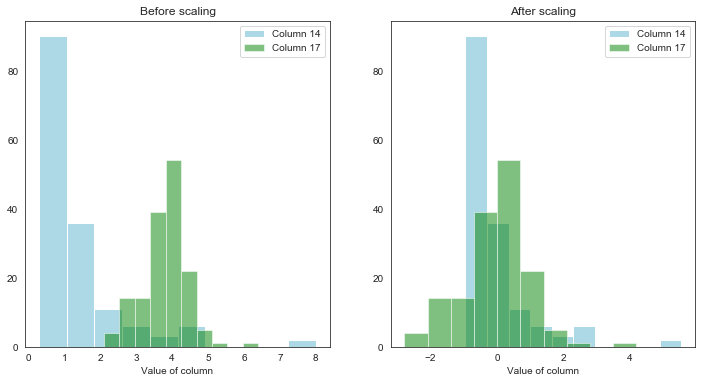

In [83]:
# Plot the distributions of columns 14 & 17 which have similar means and ranges:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),sharey=False)

print("Columns 14 and 17 - Before and after standardization")

axes[0].hist(df[14],ec='white',color='lightblue', alpha=1, label="Column 14")
axes[0].hist(df[17],ec='white',color='green',alpha=.5, label="Column 17")
axes[0].set_title("Before scaling")
axes[0].set_xlabel("Value of column")
_=axes[0].legend()

axes[1].hist(df_scaled[14],ec='white',color='lightblue', alpha=1, label="Column 14")
axes[1].hist(df_scaled[17],ec='white',color='green',alpha=.5, label="Column 17")
axes[1].set_title("After scaling")
axes[1].set_xlabel("Value of column")
_=axes[1].legend()

Columns 15 and 16 - Before and after standardization


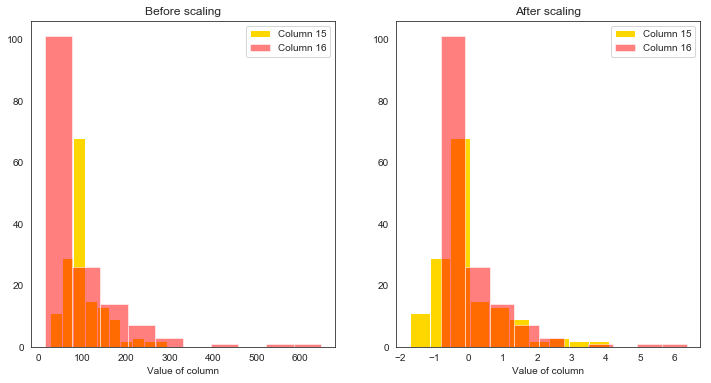

In [84]:
# Plot the distributions of columns 15 & 16 which have similar means and ranges:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,6),sharey=False)

print("Columns 15 and 16 - Before and after standardization")

axes[0].hist(df[15],ec='white',color='gold', alpha=1, label="Column 15")
axes[0].hist(df[16],ec='white',color='red',alpha=.5, label="Column 16")
axes[0].set_title("Before scaling")
axes[0].set_xlabel("Value of column")
_=axes[0].legend()

axes[1].hist(df_scaled[15],ec='white',color='gold', alpha=1, label="Column 15")
axes[1].hist(df_scaled[16],ec='white',color='red',alpha=.5, label="Column 16")
axes[1].set_title("After scaling")
axes[1].set_xlabel("Value of column")
_=axes[1].legend()

In [85]:
headers

['Survived',
 'Age',
 'Sex',
 'Steroid',
 'Antivirals',
 'Fatigue',
 'Malaise',
 'Anorexia',
 'Liver Big',
 'Liver Firm',
 'Spleen Palpable',
 'Spiders',
 'Ascites',
 'Varices',
 'Bilirubin',
 'Alk Phosphate',
 'SGOT',
 'Albumin',
 'Protime',
 'Histology']

In [86]:
# Assign the headers. Remember you dropped col 18, Protime, 
#  and added three dummy columns that already have header values: Pharma_x
headers_trunc = headers
headers_trunc.remove("Protime")
df_scaled.columns= headers_trunc + [df.columns.values[19],df.columns.values[20],df.columns.values[21]]

In [87]:
# And one last look at our final dataframe:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 0 to 154
Data columns (total 22 columns):
Survived           154 non-null int64
Age                154 non-null int64
Sex                154 non-null int64
Steroid            154 non-null int64
Antivirals         154 non-null int64
Fatigue            154 non-null int64
Malaise            154 non-null int64
Anorexia           154 non-null int64
Liver Big          154 non-null int64
Liver Firm         154 non-null int64
Spleen Palpable    154 non-null int64
Spiders            154 non-null int64
Ascites            154 non-null int64
Varices            154 non-null int64
Bilirubin          154 non-null float64
Alk Phosphate      154 non-null float64
SGOT               154 non-null float64
Albumin            154 non-null float64
Histology          154 non-null int64
Pharma_Merck       154 non-null int64
Pharma_Novartis    154 non-null int64
Pharma_Pfizer      154 non-null int64
dtypes: float64(4), int64(18)
memory usage: 27.7 KB

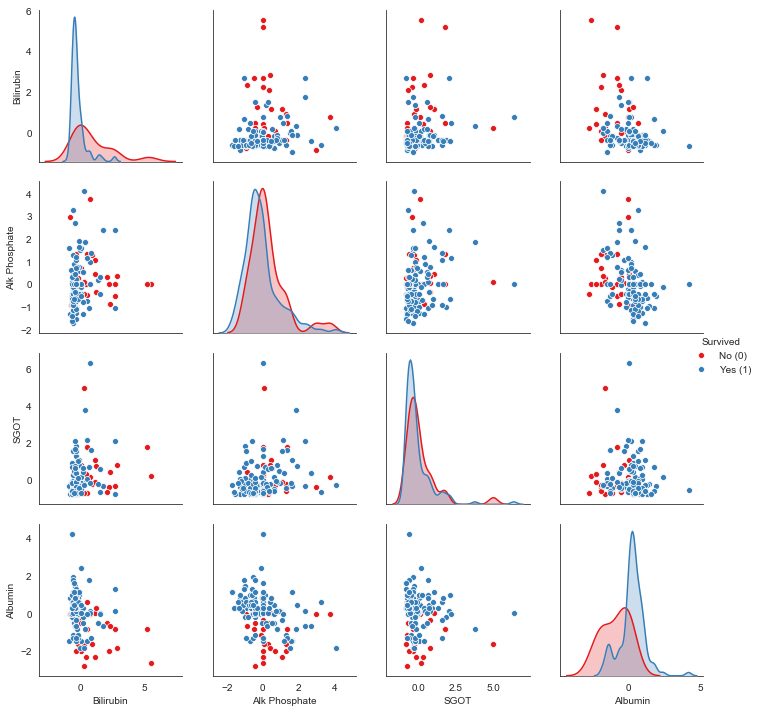

In [88]:
# Finally make a pairplot of continuous vars to see if there are any outliers
#   and start to see classification patterns.
# Shard by "Survived" so you can interrogate each outcome class separately.
#   Note that survived=0 means "Died" and survived=1 means "Lived"
sns.set_style(style='white')
g = sns.pairplot(data=df_scaled,vars=['Bilirubin','Alk Phosphate','SGOT','Albumin'],
                    hue="Survived",  palette='Set1')

# Enhance the legend a bit:
# http://catherineh.github.io/programming/2016/05/24/seaborn-pairgrid-tips
g.fig.get_children()[-1].texts[0].set_text( "No (0)" )
g.fig.get_children()[-1].texts[1].set_text( "Yes (1)" )

# Results/observations:
# 1. no outliers that need to be removed. Histograms show no unusual spreads.
# 2. hints that Albumin and possibly Bilirubin might be strong-ish predictors of outcome

In [89]:
##
## SUMMARY
##
## Review of what happened to change data from the original-from-web, df0, 
## into the final, standardized df_scaled:
## 
## 1. Aberrant data removed
##
##   a. Eliminated rows with too many missing data values (1 row)
##
##   b. Replace missing values ("?") with column means for continuous columns 14-17
##
##   c. Impute missing categorical values with dominate values 
##      based on predictor frequency and correlations (columns 3, 8-13, 20)
##
##   d. Histogram plots of the four remaining continuous attributes reveal that these 
##      predictors don't have extraordinary outliers, so we'll keep all data
##
## 2. Numeric values normalized using Standard Scaler (z-Norm) (columns 14-17)
##
## 3. Categorical variables binned
##
##    a. Decoding: Transformed the nominal multi-valued Pharma column into its 
##       English values based on translation table
##         from: 1,2,3,4,5,6
##           to: Merck, Merck Canada Inc., Novartis AG, Novartis Grimsby, Eli Lilly, Pfizer 
##
##    b. Consolidation: Simplified the Pharma column into four values (was 6) by merging 
##       subsidiaries with parent companies:
##         from: Merck, Merck Canada Inc., Novartis AG, Novartis Grimsby, Eli Lilly, Pfizer
##           to: Merck, Novartis, Eli Lilly, Pfizer
##
## 4. New categorical variables. Created dummy columns to numerically represent the multi-valued 
##      ordinal categorical feature. Dropped original column.
##          from: Pharma
##            to: Pharma_Merck, Pharma_Novartis, Pharma_Pfizer
##
## 5. Binned one continuously-numeric column into value bands (Age) (column 1)
##
## 6. Eliminated features with too much missing data (column 18)
##

In [90]:
df_scaled.to_csv("LoganDowning-M02-Dataset.csv",index=False)